In [34]:
import pandas as pd
import numpy as np
from utils import adstock, s_curve, create_transformed_tables, plot_stacked_area_with_actual, plot_transformed_vs_raw, plot_data_set
import pandas as pd

In [35]:
df_data= pd.read_csv('Data/df_data.csv', index_col=0, parse_dates=True)

In [36]:
# Create a new DataFrame with specified columns and data types
df_var_spec = pd.DataFrame({
    'variable': pd.Series(dtype='str'),
    'beta': pd.Series(dtype='float'),
    'carryover': pd.Series(dtype='float'),
    'saturation': pd.Series(dtype='float'),
    'inflection': pd.Series(dtype='float'),
    'height': pd.Series(dtype='float'),
    'normalize': pd.Series(dtype='bool')
})
df_var_spec

,variable,beta,carryover,saturation,inflection,height,normalize


In [ ]:
# Clear all rows in df_var_spec before adding new rows
df_var_spec = df_var_spec.iloc[0:0]

# Explicitly add each column of df_data as a row in df_var_spec, with 'normalize' field set to True
df_var_spec = pd.concat([
    df_var_spec,
    pd.DataFrame([{'variable': 'c', 'beta': 10, 'carryover': None, 'saturation': None, 'inflection': None, 'height': None, 'normalize': False}]),
    pd.DataFrame([{'variable': 'seasonality', 'beta': 2, 'carryover': None, 'saturation': None, 'inflection': None, 'height': None, 'normalize': True}]),
    pd.DataFrame([{'variable': 'holidays', 'beta': 1, 'carryover': None, 'saturation': None, 'inflection': None, 'height': None, 'normalize': False}]),
    pd.DataFrame([{'variable': 'price', 'beta': -1, 'carryover': None, 'saturation': None, 'inflection': None, 'height': None, 'normalize': True}]),
    pd.DataFrame([{'variable': 'distribution', 'beta': 1, 'carryover': None, 'saturation': None, 'inflection': None, 'height': None, 'normalize': True}]),
    pd.DataFrame([{'variable': 'media1', 'beta': 1, 'carryover': 0.5, 'saturation': None, 'inflection': None, 'height': None, 'normalize': True}]),
    pd.DataFrame([{'variable': 'media2', 'beta': 1, 'carryover': 0.7, 'saturation': 500, 'inflection': 1.96, 'height': 2.75, 'normalize': True}]),
    pd.DataFrame([{'variable': 'media3', 'beta': 1, 'carryover': 0.2, 'saturation': 15, 'inflection': 1.2, 'height': 1, 'normalize': True}]),
    pd.DataFrame([{'variable': 'error', 'beta': 0.2, 'carryover': None, 'saturation': None, 'inflection': None, 'height': 1, 'normalize': False}])
], ignore_index=True)

df_var_spec

C:\Users\User\AppData\Local\Temp\ipykernel_34312\3150906115.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_var_spec = pd.concat([


,variable,beta,carryover,saturation,inflection,height,normalize
0,c,10.0,NaN,None,NaN,NaN,False
1,holidays,1.0,NaN,None,NaN,NaN,False
2,holidays,1.0,NaN,None,NaN,NaN,False
3,price,-1.0,NaN,None,NaN,NaN,True
4,distribution,1.0,NaN,None,NaN,NaN,True
5,media1,1.0,0.5,None,NaN,NaN,True
6,media2,1.0,0.7,500,1.96,2.75,True
7,media3,1.0,0.2,15,1.20,1.00,True
8,error,0.2,NaN,None,NaN,1.00,False


In [38]:
var = 'media1';
spec = df_var_spec.loc[df_var_spec['variable'] == var].iloc[0].to_dict()

# Now you can access values like spec['carryover'], spec['saturation'], etc.
carryover = spec['carryover']
sat = spec['saturation']
inf = spec['inflection']
height = spec['height']

# adstock = pd.Series(adstock(df_data[var].values, carryover), index=df_data.index)
var_adstock = adstock(df_data[var].values, carryover)

if sat is not None:
    var_s_curve = s_curve(var_adstock, saturation=sat, inflection=inf, height=height)
    plot_transformed_vs_raw(var_adstock, var_s_curve, xlabel=f'Raw {var} values', ylabel=f'Transformed {var} values (s_curve)', title=f'Line Plot: Raw vs Transformed {var}')


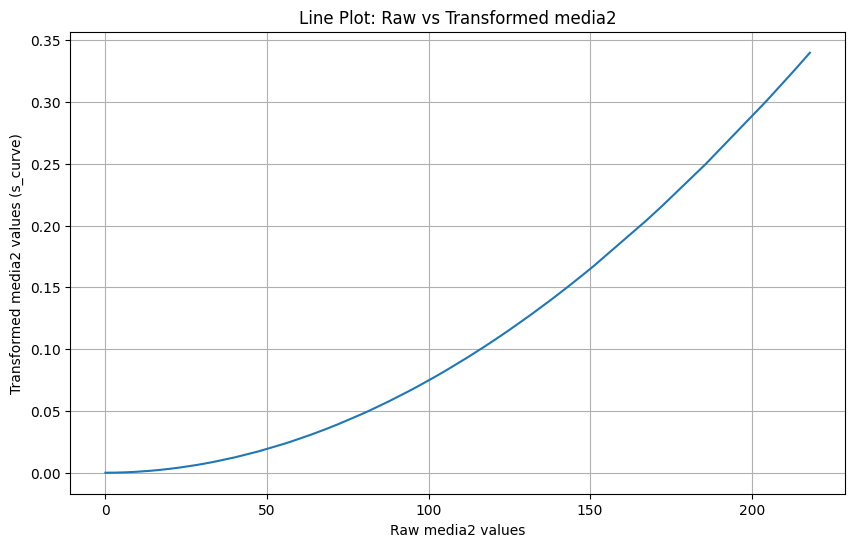

In [39]:
var = 'media2';
spec = df_var_spec.loc[df_var_spec['variable'] == var].iloc[0].to_dict()

# Now you can access values like spec['carryover'], spec['saturation'], etc.
carryover = spec['carryover']
sat = spec['saturation']
inf = spec['inflection']
height = spec['height']

# adstock = pd.Series(adstock(df_data[var].values, carryover), index=df_data.index)
var_adstock = adstock(df_data[var].values, carryover)


# Apply s_curve transformation using parameters from var spec
var_s_curve = s_curve(var_adstock, saturation=sat, inflection=inf, height=height)

# Plot using the function
plot_transformed_vs_raw(var_adstock, var_s_curve, xlabel=f'Raw {var} values', ylabel=f'Transformed {var} values (s_curve)', title=f'Line Plot: Raw vs Transformed {var}')


In [40]:
# Example usage:
df_trans,df_trans_norm,df_values = create_transformed_tables(df_data, df_var_spec)
df_values.head()

,c,holidays,price,distribution,media1,media2,media3,error,actual
2022-01-01,10.0,0.0,-2.5,2.0,0.214417,0.0,0.0,-0.187916,9.526501
2022-01-08,10.0,0.0,-2.5,2.0,0.409375,0.0,0.0,-0.059196,9.850178
2022-01-15,10.0,0.0,-2.5,2.0,0.386244,0.0,0.0,0.026792,9.913037
2022-01-22,10.0,1.0,-2.5,2.0,0.506415,0.0,0.0,-0.120288,10.886127
2022-01-29,10.0,0.0,-2.5,2.0,0.634297,0.0,0.0,0.350118,10.484415


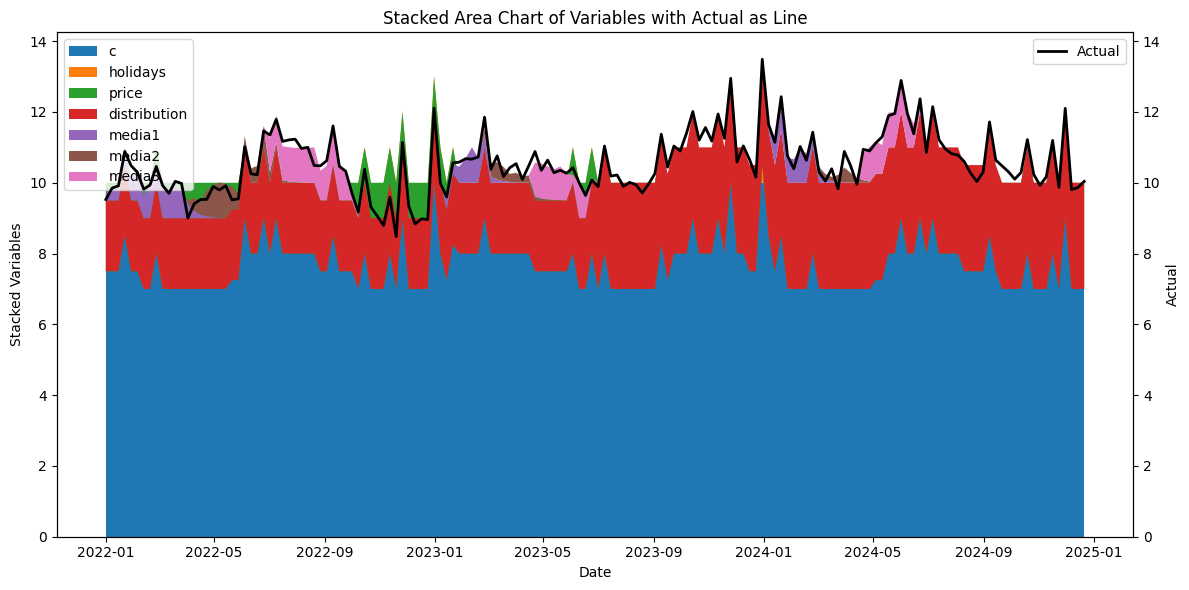

In [41]:
plot_stacked_area_with_actual(df_values, y_axis_min=None, y_axis_max=None)

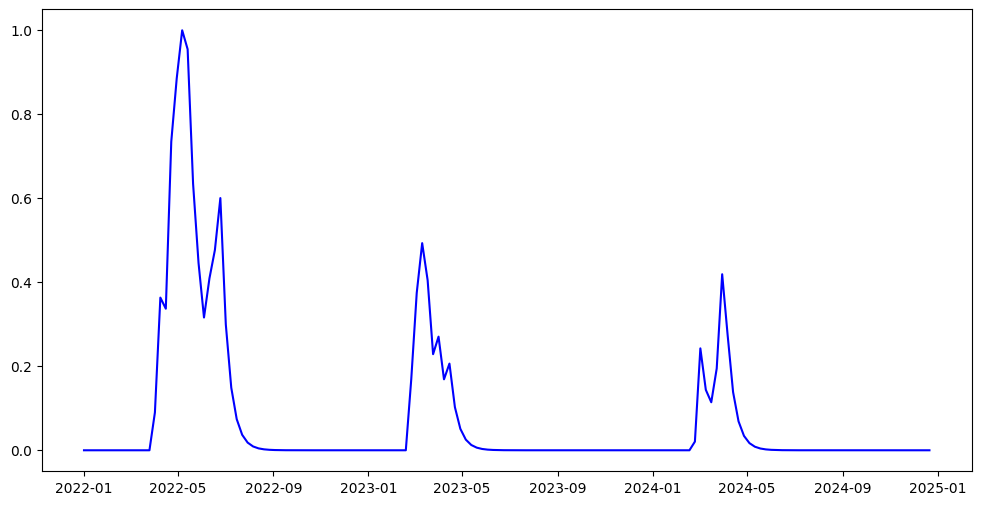

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_values.index, df_values['media2'], label='media1 (contribution)', color='blue')

plt.show()


In [43]:
import os

os.makedirs('Data', exist_ok=True)

if 'df_trans' in globals():
    df_trans.to_csv('Data/df_trans2.csv')
if 'df_trans_norm' in globals():
    df_trans_norm.to_csv('Data/df_trans_norm2.csv')
if 'df_values' in globals():
    df_values.to_csv('Data/df_values2.csv')
if 'df_var_spec' in globals():
    df_var_spec.to_csv('Data/df_var_spec2.csv')